In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [96]:
# PS2_1
## 1.1
Sig_Eqs = pd.read_csv('earthquakes-2021-10-21_12-22-57_+0800.tsv', sep='\t')
total_number_of_deaths = Sig_Eqs['Deaths'].sum()
the_top_ten_countries = Sig_Eqs.sort_values(by='Deaths',ascending=False).head(10)
the_top_ten_countries

## 1.2

group_mag = Sig_Eqs[Sig_Eqs['Mag']>6.0].groupby(['Year']).count()
plt.ylabel('total_mag>6')
group_mag['Mag'].plot()

## 1.3

def CountEq_LargestEq(country):
    total = Sig_Eqs[Sig_Eqs['Country']==country]
    num = total[total['Mag']>0].count()['Year']
    temp_total = total.sort_values(by='Mag',ascending = False).head()
    de_total = temp_total.sort_values(by='Year',ascending = False).head()
    de_total = de_total.reset_index(drop = True)
    date = de_total.loc[0,['Year','Mo','Dy','Hr']]
    return(num),(date)

res = pd.DataFrame(columns=['Country','total_mag','date'])
country=[]
for (Country),group in Sig_Eqs[Sig_Eqs['Mag']>0].groupby('Country'):
    country.append(Country)

x=0
for i in country:
    res.loc[str(x)] = [i,CountEq_LargestEq(i)[0],CountEq_LargestEq(i)[1]]
    x+=1

res = res.sort_values(by='total_mag',ascending=False)
res = res.reset_index(drop = True)
res

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
682,NaN,1556.0,1.0,23.0,NaN,NaN,NaN,NaN,NaN,CHINA,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
5638,NaN,2010.0,1.0,12.0,21.0,53.0,10.0,4622.0,NaN,HAITI,...,NaN,NaN,300000.0,4.0,8000.0,4.0,97294.0,4.0,188383.0,4.0
76,NaN,115.0,12.0,13.0,NaN,NaN,NaN,4396.0,NaN,TURKEY,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
151,NaN,525.0,5.0,29.0,NaN,NaN,NaN,NaN,NaN,TURKEY,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
4278,NaN,1976.0,7.0,27.0,19.0,42.0,54.6,NaN,NaN,CHINA,...,NaN,NaN,799000.0,4.0,5600.0,4.0,NaN,NaN,NaN,NaN
358,NaN,1139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AZERBAIJAN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN
236,NaN,856.0,12.0,22.0,NaN,NaN,NaN,NaN,NaN,IRAN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN
2925,NaN,1920.0,12.0,16.0,12.0,5.0,54.7,3541.0,NaN,CHINA,...,NaN,NaN,NaN,NaN,25.0,4.0,NaN,NaN,NaN,NaN
257,NaN,893.0,12.0,24.0,NaN,NaN,NaN,NaN,NaN,ARMENIA,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN
2984,NaN,1923.0,9.0,1.0,2.0,58.0,37.0,1526.0,NaN,JAPAN,...,43476.0,4.0,47000.0,4.0,600.0,4.0,695000.0,4.0,NaN,NaN


Text(0.5, 1.0, ' Monthly averaged wind speed')

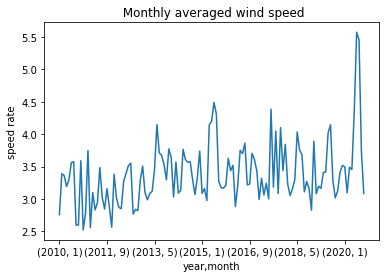

In [3]:
# PS2_2
## 2
Data = pd.read_csv("2281305.csv",low_memory=False)
temp = Data.loc[:,['DATE','WND']]
wind = temp['WND'].str.split(',',expand=True)
# temp = pd.DataFrame(temp,columns = ['direction angle','direction quality code','type code','speed rate','speed quality code']
wind
temp['WND'] = wind[3].astype(int)/10
temp['WND'].replace(999.9,np.nan,inplace=True)
temp['year'] = pd.DatetimeIndex(temp.DATE).year
temp['month'] = pd.DatetimeIndex(temp.DATE).month
temp.columns = ['date','speed rate','year','month']
temp.groupby(['year','month'])['speed rate'].mean().plot()
plt.ylabel('speed rate')
plt.title(' Monthly averaged wind speed')

22.324319423938665

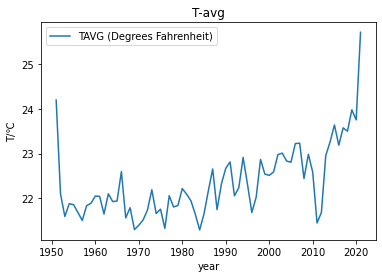

In [90]:
# PS2_3
## 3.1

df = pd.read_csv("data.csv")
del df['PRCP (Inches)']
del df['SNOW (Inches)']
del df['SNWD (Inches)']
del df['TMIN (Degrees Fahrenheit)']
del df['TMAX (Degrees Fahrenheit)']
# df['TAVG (Degrees Fahrenheit)'].replace(np.nan,0,inplace=True)

## 3.2
# 华氏度 = 32+ 摄氏度× 1.8

df['TAVG (Degrees Fahrenheit)']=(df['TAVG (Degrees Fahrenheit)']-32)/1.8
df['year'] = pd.DatetimeIndex(df.Date).year
df.groupby('year').mean().plot()
plt.title('T-avg')
plt.ylabel('T/℃')
plt.xlabel('year')


##3.3
df['TAVG (Degrees Fahrenheit)'].describe()
df['TAVG (Degrees Fahrenheit)'].count()
df['TAVG (Degrees Fahrenheit)'].mean()
df['TAVG (Degrees Fahrenheit)'].max()
df['TAVG (Degrees Fahrenheit)'].min()